In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# Leer archivos
trad_df = pd.read_excel("Fondos_Tradicionales_TFG.xlsx")
impact_df = pd.read_excel("Fondos_Impacto_TFG.xlsx")

# Añadir tipo
trad_df['tipo'] = 'tradicional'
impact_df['tipo'] = 'impacto'

In [3]:
trad_df.head()

,Funds,Fund Country/Territory/Region,Fund Type,Fund Size,Vintage,Fund Quartile,IRR,RVPI,DPI,TVPI,...,Called Down %,Open Date,Close Date,Fund Location,BENCHMARK: TOP DECILE,BENCHMARK UPPER-MID QUARTILE,BENCHMARK: MEDIAN,BENCHMARK BOTTOM QUARTILE,BENCHMARK: BOTTOM DECILE,tipo
0,Nogales Investors I,United States,Buyout,148.82,2001,4 (Bottom Quartile),-7.60,NaN,NaN,0.70,...,100.00,NaT,2001-01-01,"West Hollywood, CA","34,48%",22.99,"12,20%",5.06,"-7,94%",tradicional
1,Dresdner Emerging Europe Fund,Germany,Buyout,165.35,2001,4 (Bottom Quartile),-6.50,NaN,0.75,0.76,...,87.46,NaT,2001-01-01,"Frankfurt, Germany","39,36%",16.50,"13,04%",7.00,"0,30%",tradicional
2,Goense Bounds Partners,United States,Buyout,248.03,2001,4 (Bottom Quartile),-0.51,NaN,0.98,0.98,...,100.00,NaT,2001-01-01,"Miami, FL","34,48%",22.99,"12,20%",5.06,"-7,94%",tradicional
3,Quadrangle Capital Partners,United States,Buyout,1260.08,2001,3 (Lower-Mid Quartile),11.10,NaN,1.72,1.72,...,92.49,NaT,2001-07-24,"New York, NY","42,51%",25.92,"14,34%",10.23,"6,34%",tradicional
4,Rosewood Capital IV,United States,Buyout,248.03,2001,3 (Lower-Mid Quartile),12.00,NaN,0.97,1.47,...,62.41,NaT,2001-01-01,"Lafayette, CA","34,48%",22.99,"12,20%",5.06,"-7,94%",tradicional


In [4]:
impact_df.head()

,Funds,Fund Country/Territory/Region,Impact Category Preferences,Fund Type,Fund Size,Vintage,Fund Quartile,IRR,RVPI,DPI,...,IRR 4Q00,IRR 3Q00,IRR 2Q00,IRR 1Q00,BENCHMARK TOP DECILE,BENCHMARK UPPER-MID QUARTILE,BENCHMARK MEDIAN,BENCHMARK BOTTOM QUARTILE,BENCHMARK BOTTOM DECILE,tipo
0,Crescent Capital Partners VII,Australia,Clima,Buyout,933.20,2023,NaN,-29.91,0.68,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,impacto
1,Aureos Central America Fund,United Kingdom,Servicios Financieros,Buyout,40.69,2002,4 (Bottom Quartile),-26.73,NaN,NaN,...,NaN,NaN,NaN,NaN,0.2461,13.30,0.0930,5.69,-0.0491,impacto
2,LS Power Equity Partners V,United States,"Aire, Clima, Energía, Infraestructura",Buyout,2458.15,2024,4 (Bottom Quartile),-25.91,0.33,0.65,...,NaN,NaN,NaN,NaN,0.4773,16.08,0.0196,-9.11,-0.2972,impacto
3,Climate Change Capital Private Equity Fund,United Kingdom,"Clima, Energía, Residuos, Agua",Buyout,200.00,2007,4 (Bottom Quartile),-25.65,0.10,0.07,...,NaN,NaN,NaN,NaN,0.1800,10.94,0.0840,4.82,-0.0887,impacto
4,Decarbonization Partners Fund I,United States,NaN,Growth/Expansion,1303.15,2022,4 (Bottom Quartile),-21.61,0.82,0.00,...,NaN,NaN,NaN,NaN,0.2394,17.02,0.1033,-2.20,-0.1298,impacto


In [5]:
trad_df.describe()


,Fund Size,Vintage,IRR,RVPI,DPI,TVPI,Contributed,Distributed,Fund NAV,Distributed + NAV,Dry Powder,Dry Powder %,Called Down %,Open Date,Close Date,BENCHMARK UPPER-MID QUARTILE,BENCHMARK BOTTOM QUARTILE
count,435.000000,435.000000,435.000000,279.000000,374.000000,382.000000,367.000000,370.000000,291.000000,324.000000,385.000000,385.000000,367.000000,287,435,435.000000,435.000000
mean,730.487655,2008.404598,14.310161,0.333369,1.558770,1.854764,783.807030,1191.607351,287.503711,1509.471543,60.017974,7.616442,92.359237,2009-02-22 10:57:16.933797888,2009-04-05 21:24:24.827586304,17.720368,6.806943
min,2.280000,2001.000000,-49.710000,0.000000,0.000000,0.010000,7.510000,0.000000,0.000000,1.470000,0.000000,0.000000,5.900000,2000-01-03 00:00:00,2001-01-01 00:00:00,7.220000,-28.860000
25%,176.620000,2005.000000,7.285000,0.000000,1.042500,1.332500,170.900000,177.082500,0.000000,315.282500,4.660000,2.480000,91.070000,2005-03-01 00:00:00,2005-10-19 12:00:00,13.350000,4.500000
50%,390.600000,2007.000000,13.200000,0.040000,1.540000,1.715000,444.580000,597.385000,10.110000,802.575000,16.750000,4.950000,99.230000,2007-04-01 00:00:00,2007-09-01 00:00:00,16.700000,6.230000
75%,902.850000,2011.000000,20.100000,0.535000,1.960000,2.200000,1036.520000,1493.145000,190.735000,2035.537500,38.450000,8.400000,100.000000,2013-06-07 00:00:00,2011-12-31 12:00:00,21.135000,9.610000
max,3944.660000,2024.000000,83.720000,3.780000,6.610000,6.920000,4597.370000,10783.320000,6480.130000,11701.530000,2752.460000,94.100000,100.000000,2022-09-30 00:00:00,2024-06-27 00:00:00,51.000000,26.330000
std,837.792492,5.250585,14.852072,0.527747,0.944079,0.871996,910.547901,1574.259859,757.981526,1842.621198,207.314789,11.401801,14.974905,NaN,NaN,6.284371,4.873253


In [6]:
impact_df.describe()

,Fund Size,Vintage,IRR,RVPI,DPI,TVPI,Contributed,Distributed,Fund NAV,Distributed + NAV,...,IRR 1Q01,IRR 4Q00,IRR 3Q00,IRR 2Q00,IRR 1Q00,BENCHMARK TOP DECILE,BENCHMARK UPPER-MID QUARTILE,BENCHMARK MEDIAN,BENCHMARK BOTTOM QUARTILE,BENCHMARK BOTTOM DECILE
count,127.000000,128.000000,128.000000,91.000000,96.000000,100.00000,93.000000,84.000000,90.000000,82.000000,...,1.00,0.0,0.0,0.0,0.0,122.000000,120.00000,120.000000,120.000000,122.000000
mean,533.322126,2013.382812,10.427188,0.693736,0.861875,1.52940,436.513226,313.611429,346.353444,664.124634,...,-0.16,NaN,NaN,NaN,NaN,0.306720,21.49200,0.135847,7.273750,0.009189
min,3.440000,2001.000000,-29.910000,0.000000,0.000000,0.17000,6.670000,0.000000,0.000000,7.370000,...,-0.16,NaN,NaN,NaN,NaN,0.070400,8.33000,0.003600,-13.400000,-0.321200
25%,63.765000,2008.000000,1.525000,0.210000,0.187500,1.10000,70.910000,7.490000,16.222500,100.592500,...,-0.16,NaN,NaN,NaN,NaN,0.239400,16.70000,0.102100,4.820000,-0.030650
50%,200.000000,2014.000000,9.000000,0.690000,0.630000,1.34500,186.540000,103.000000,76.790000,243.185000,...,-0.16,NaN,NaN,NaN,NaN,0.277300,20.63000,0.136300,7.180000,0.015200
75%,691.095000,2018.250000,19.250000,1.030000,1.457500,1.80250,556.240000,328.807500,341.255000,1045.207500,...,-0.16,NaN,NaN,NaN,NaN,0.343700,24.47000,0.163050,10.712500,0.054975
max,3600.000000,2025.000000,65.100000,3.040000,4.160000,4.85000,2593.730000,2151.880000,2709.190000,3402.760000,...,-0.16,NaN,NaN,NaN,NaN,0.805900,51.00000,0.377000,17.690000,0.153700
std,754.359562,6.347076,16.009180,0.553636,0.806174,0.69456,564.378976,486.852810,586.601724,823.617158,...,NaN,NaN,NaN,NaN,NaN,0.114217,8.04022,0.053783,5.403739,0.080752


In [7]:
# Calcular riesgo para cada dataset
# Valores ya están en porcentaje (no hay que dividir ni multiplicar)
trad_df['Q1'] = pd.to_numeric(trad_df['BENCHMARK BOTTOM QUARTILE'], errors='coerce')
trad_df['Q3'] = pd.to_numeric(trad_df['BENCHMARK UPPER-MID QUARTILE'], errors='coerce')
impact_df['Q1'] = pd.to_numeric(impact_df['BENCHMARK BOTTOM QUARTILE'], errors='coerce')
impact_df['Q3'] = pd.to_numeric(impact_df['BENCHMARK UPPER-MID QUARTILE'], errors='coerce')

trad_df['riesgo'] = (trad_df['Q3'] - trad_df['Q1']) / 1.35
impact_df['riesgo'] = (impact_df['Q3'] - impact_df['Q1']) / 1.35


In [8]:
trad_df.head()

,Funds,Fund Country/Territory/Region,Fund Type,Fund Size,Vintage,Fund Quartile,IRR,RVPI,DPI,TVPI,...,Fund Location,BENCHMARK: TOP DECILE,BENCHMARK UPPER-MID QUARTILE,BENCHMARK: MEDIAN,BENCHMARK BOTTOM QUARTILE,BENCHMARK: BOTTOM DECILE,tipo,Q1,Q3,riesgo
0,Nogales Investors I,United States,Buyout,148.82,2001,4 (Bottom Quartile),-7.60,NaN,NaN,0.70,...,"West Hollywood, CA","34,48%",22.99,"12,20%",5.06,"-7,94%",tradicional,5.06,22.99,13.281481
1,Dresdner Emerging Europe Fund,Germany,Buyout,165.35,2001,4 (Bottom Quartile),-6.50,NaN,0.75,0.76,...,"Frankfurt, Germany","39,36%",16.50,"13,04%",7.00,"0,30%",tradicional,7.00,16.50,7.037037
2,Goense Bounds Partners,United States,Buyout,248.03,2001,4 (Bottom Quartile),-0.51,NaN,0.98,0.98,...,"Miami, FL","34,48%",22.99,"12,20%",5.06,"-7,94%",tradicional,5.06,22.99,13.281481
3,Quadrangle Capital Partners,United States,Buyout,1260.08,2001,3 (Lower-Mid Quartile),11.10,NaN,1.72,1.72,...,"New York, NY","42,51%",25.92,"14,34%",10.23,"6,34%",tradicional,10.23,25.92,11.622222
4,Rosewood Capital IV,United States,Buyout,248.03,2001,3 (Lower-Mid Quartile),12.00,NaN,0.97,1.47,...,"Lafayette, CA","34,48%",22.99,"12,20%",5.06,"-7,94%",tradicional,5.06,22.99,13.281481


In [9]:
impact_df.head()

,Funds,Fund Country/Territory/Region,Impact Category Preferences,Fund Type,Fund Size,Vintage,Fund Quartile,IRR,RVPI,DPI,...,IRR 1Q00,BENCHMARK TOP DECILE,BENCHMARK UPPER-MID QUARTILE,BENCHMARK MEDIAN,BENCHMARK BOTTOM QUARTILE,BENCHMARK BOTTOM DECILE,tipo,Q1,Q3,riesgo
0,Crescent Capital Partners VII,Australia,Clima,Buyout,933.20,2023,NaN,-29.91,0.68,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,impacto,NaN,NaN,NaN
1,Aureos Central America Fund,United Kingdom,Servicios Financieros,Buyout,40.69,2002,4 (Bottom Quartile),-26.73,NaN,NaN,...,NaN,0.2461,13.30,0.0930,5.69,-0.0491,impacto,5.69,13.30,5.637037
2,LS Power Equity Partners V,United States,"Aire, Clima, Energía, Infraestructura",Buyout,2458.15,2024,4 (Bottom Quartile),-25.91,0.33,0.65,...,NaN,0.4773,16.08,0.0196,-9.11,-0.2972,impacto,-9.11,16.08,18.659259
3,Climate Change Capital Private Equity Fund,United Kingdom,"Clima, Energía, Residuos, Agua",Buyout,200.00,2007,4 (Bottom Quartile),-25.65,0.10,0.07,...,NaN,0.1800,10.94,0.0840,4.82,-0.0887,impacto,4.82,10.94,4.533333
4,Decarbonization Partners Fund I,United States,NaN,Growth/Expansion,1303.15,2022,4 (Bottom Quartile),-21.61,0.82,0.00,...,NaN,0.2394,17.02,0.1033,-2.20,-0.1298,impacto,-2.20,17.02,14.237037


In [10]:
# Unir ambos datasets
df = pd.concat([trad_df, impact_df], ignore_index=True)

In [11]:
# Filtrar columnas necesarias para graficar
df_plot = df[['tipo', 'IRR', 'riesgo']].dropna()

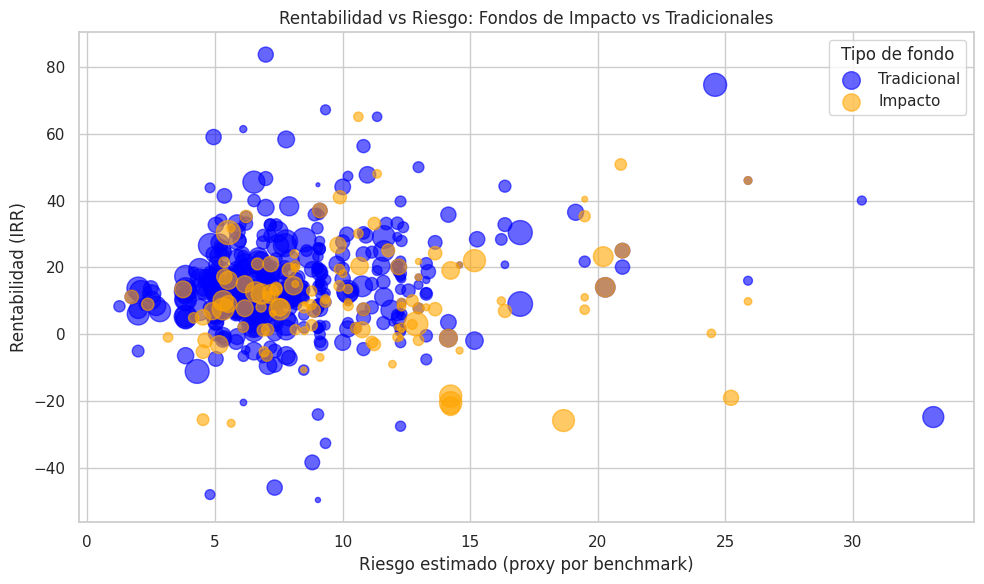

In [12]:
# Exploración visual de la rentabilidad y el riesgo

# Paleta de colores y estilo homogéneos
colores = {'tradicional': 'blue', 'impacto': 'orange'}
sns.set(style="whitegrid")

# Verificar si existe 'Fund Size' y crear tamaño si procede
if 'Fund Size' in df.columns:
    df_plot = df[['tipo', 'IRR', 'riesgo', 'Fund Size']].dropna().copy()
    df_plot['size'] = np.sqrt(df_plot['Fund Size']) * 5
else:
    df_plot = df[['ripo', 'IRR', 'riesgo']].dropna().copy()
    df_plot['size'] = 100  # tamaño fijo

# Figura
plt.figure(figsize=(10, 6))
plt.title("Rentabilidad vs Riesgo: Fondos de Impacto vs Tradicionales")

# Gráfico de dispersión
for fondo_tipo in ['tradicional', 'impacto']:
    tipo_df = df_plot[df_plot['tipo'] == fondo_tipo]
    if tipo_df.empty:
        continue

    plt.scatter(tipo_df['riesgo'], tipo_df['IRR'],
                s=tipo_df['size'],
                color=colores[fondo_tipo],
                alpha=0.6,
                label=fondo_tipo.capitalize())

plt.xlabel("Riesgo estimado (proxy por benchmark)")
plt.ylabel("Rentabilidad (IRR)")
plt.legend(title="Tipo de fondo")
plt.tight_layout()
plt.show()


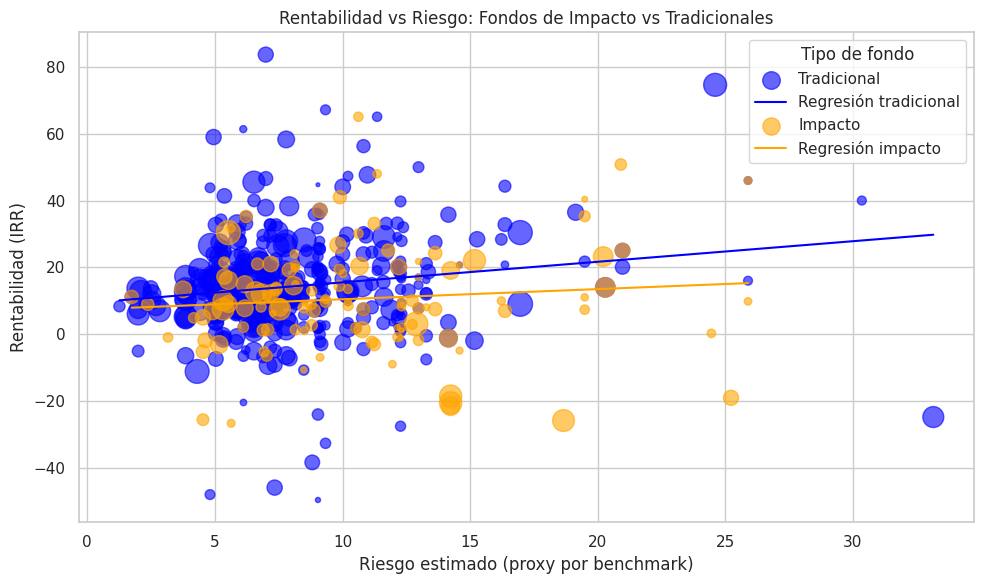

In [13]:
# Regresión Lineal Simple por Tipo de Fondo

plt.figure(figsize=(10, 6))
plt.title("Rentabilidad vs Riesgo: Fondos de Impacto vs Tradicionales")

#
if 'Fund Size' in df_plot.columns:
    df_plot['size'] = np.sqrt(df_plot['Fund Size']) * 5
else:
    df_plot['size'] = 100

# Inicializar modelos fuera del bucle
modelo_trad = None
modelo_imp = None

# Dibujar dispersión y regresión para cada tipo de fondo
for fondo_tipo in ['tradicional', 'impacto']:
    tipo_df = df_plot[df_plot['tipo'] == fondo_tipo]
    if tipo_df.empty:
        continue

    # Gráfico de dispersión
    plt.scatter(tipo_df['riesgo'], tipo_df['IRR'],
                s=tipo_df['size'],
                alpha=0.6,
                color=colores[fondo_tipo],
                label=fondo_tipo.capitalize())

    # Ajustar y graficar regresión lineal
    X = sm.add_constant(tipo_df['riesgo'])
    y = tipo_df['IRR']
    modelo = sm.OLS(y, X).fit()

    # Guardar modelo correspondiente
    if fondo_tipo == 'tradicional':
        modelo_trad = modelo
    else:
        modelo_imp = modelo

    # Graficar la regresión
    x_vals = np.linspace(tipo_df['riesgo'].min(), tipo_df['riesgo'].max(), 100)
    X_vals = sm.add_constant(x_vals)
    y_vals = modelo.predict(X_vals)
    plt.plot(x_vals, y_vals, color=colores[fondo_tipo], label=f"Regresión {fondo_tipo}")

# Etiquetas
plt.xlabel("Riesgo estimado (proxy por benchmark)")
plt.ylabel("Rentabilidad (IRR)")
plt.legend(title="Tipo de fondo")
plt.tight_layout()
plt.show()


=== Regresión para Fondos Tradicionales ===
                            OLS Regression Results                            
Dep. Variable:                    IRR   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     11.12
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           0.000926
Time:                        14:47:20   Log-Likelihood:                -1784.9
No. Observations:                 435   AIC:                             3574.
Df Residuals:                     433   BIC:                             3582.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

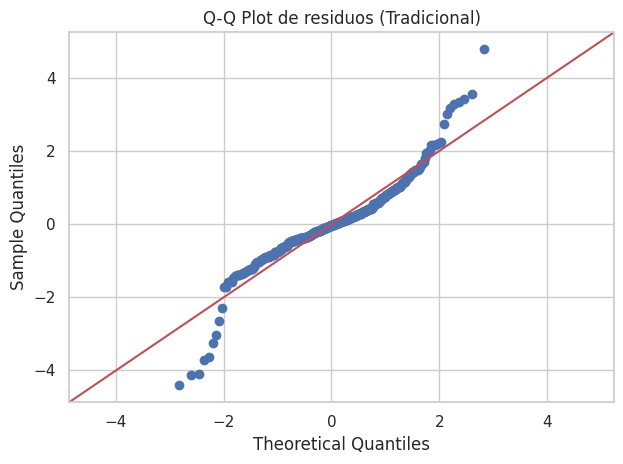

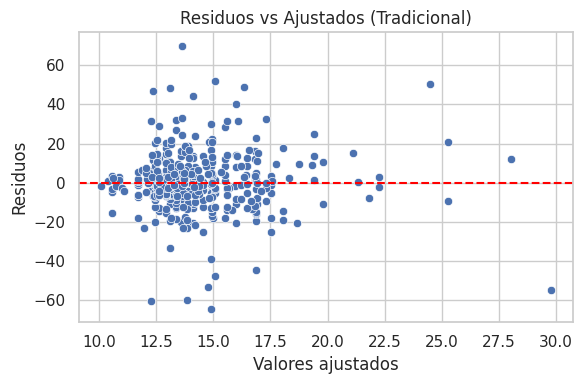

VIF Tradicional:
  Variable       VIF
0    const  5.503787
1   riesgo  1.000000


In [14]:
print("=== Regresión para Fondos Tradicionales ===")
print(modelo_trad.summary())

# Residuos
resid_trad = modelo_trad.resid
fitted_trad = modelo_trad.fittedvalues

# Q-Q Plot (normalidad)
sm.qqplot(resid_trad, line='45', fit=True)
plt.title('Q-Q Plot de residuos (Tradicional)')
plt.tight_layout()
plt.show()

# Homocedasticidad
plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted_trad, y=resid_trad)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Ajustados (Tradicional)')
plt.tight_layout()
plt.show()

# VIF (aunque con una sola variable explicativa no es relevante, se deja como estructura)
X_trad_vif = sm.add_constant(trad_df[['riesgo']].dropna())
vif_trad = pd.DataFrame()
vif_trad["Variable"] = X_trad_vif.columns
vif_trad["VIF"] = [variance_inflation_factor(X_trad_vif.values, i) for i in range(X_trad_vif.shape[1])]
print("VIF Tradicional:")
print(vif_trad)

=== Regresión para Fondos de Impacto ===
                            OLS Regression Results                            
Dep. Variable:                    IRR   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.188
Date:                Wed, 02 Jul 2025   Prob (F-statistic):              0.278
Time:                        14:47:21   Log-Likelihood:                -497.27
No. Observations:                 120   AIC:                             998.5
Df Residuals:                     118   BIC:                             1004.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

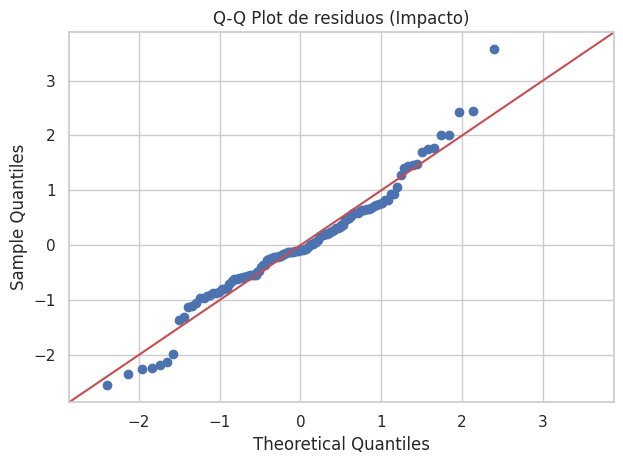

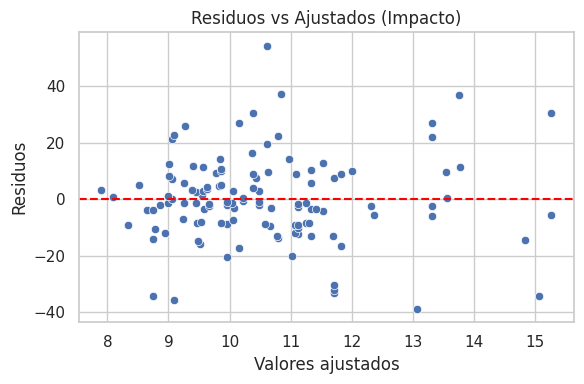

VIF Impacto:
  Variable       VIF
0    const  5.403366
1   riesgo  1.000000


In [15]:
print("=== Regresión para Fondos de Impacto ===")
print(modelo_imp.summary())

resid_imp = modelo_imp.resid
fitted_imp = modelo_imp.fittedvalues

sm.qqplot(resid_imp, line='45', fit=True)
plt.title('Q-Q Plot de residuos (Impacto)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted_imp, y=resid_imp)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Ajustados (Impacto)')
plt.tight_layout()
plt.show()

X_imp_vif = sm.add_constant(impact_df[['riesgo']].dropna())
vif_imp = pd.DataFrame()
vif_imp["Variable"] = X_imp_vif.columns
vif_imp["VIF"] = [variance_inflation_factor(X_imp_vif.values, i) for i in range(X_imp_vif.shape[1])]
print("VIF Impacto:")
print(vif_imp)

In [16]:
# Modelo de Regresión Lineal Múltiple

# Convertir fechas
df['Open Date'] = pd.to_datetime(df['Open Date'], errors='coerce')
df['Close Date'] = pd.to_datetime(df['Close Date'], errors='coerce')

# Usar 31 diciembre 2024 como fecha de corte si el fondo sigue abierto
df['Fecha Corte'] = pd.to_datetime('2024-12-31')
df['End Date'] = df['Close Date'].fillna(df['Fecha Corte'])

# Calcular duración en años
df['duracion_fondo'] = (df['End Date'] - df['Open Date']).dt.days / 365.25

# Asegúrate de que no haya valores faltantes
reg_df = df[['IRR', 'riesgo', 'tipo', 'duracion_fondo', 'Fund Size']].dropna().copy()

# Codificar 'tipo' como dummy: 0 = tradicional, 1 = impacto
reg_df['tipo'] = reg_df['tipo'].map({'tradicional': 0, 'impacto': 1})

# Transformar el tamaño del fondo con logaritmo
reg_df['log_fund_size'] = np.log(reg_df['Fund Size'])

# Modelo de regresión lineal SIN Vintage y CON duración
modelo = smf.ols(
    formula="IRR ~ riesgo + tipo + log_fund_size + duracion_fondo",
    data=reg_df
).fit()

# Resultados
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    IRR   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.719
Date:                Wed, 02 Jul 2025   Prob (F-statistic):             0.0295
Time:                        14:47:21   Log-Likelihood:                -1533.5
No. Observations:                 379   AIC:                             3077.
Df Residuals:                     374   BIC:                             3097.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         13.6458      4.206      3.


=== REGRESIÓN PARA <50% devuelto | TRADICIONAL ===
                            OLS Regression Results                            
Dep. Variable:                    IRR   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     9.257
Date:                Wed, 02 Jul 2025   Prob (F-statistic):            0.00408
Time:                        14:47:21   Log-Likelihood:                -191.34
No. Observations:                  43   AIC:                             386.7
Df Residuals:                      41   BIC:                             390.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


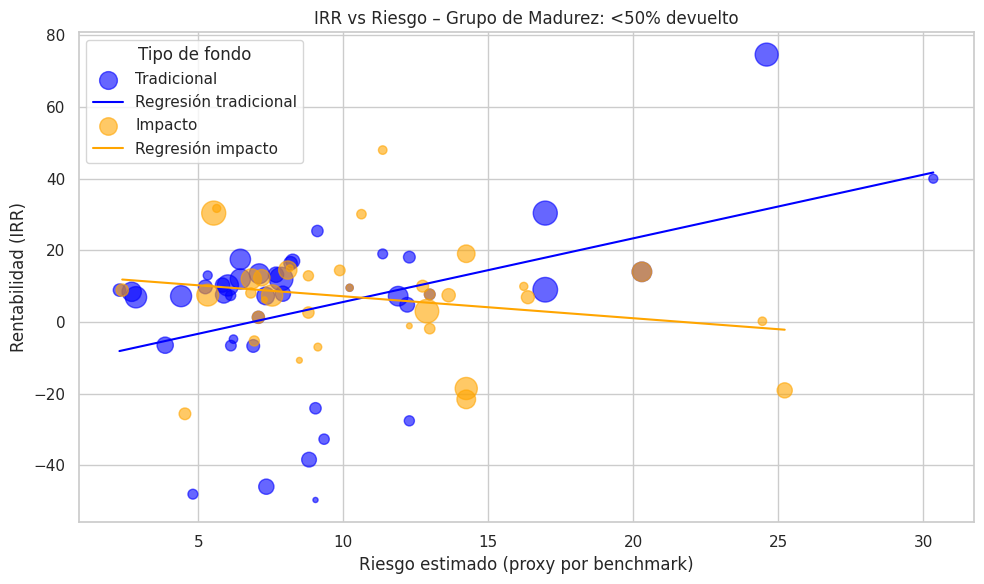


=== REGRESIÓN PARA 50–99% | TRADICIONAL ===
                            OLS Regression Results                            
Dep. Variable:                    IRR   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     4.839
Date:                Wed, 02 Jul 2025   Prob (F-statistic):             0.0333
Time:                        14:47:22   Log-Likelihood:                -175.34
No. Observations:                  45   AIC:                             354.7
Df Residuals:                      43   BIC:                             358.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

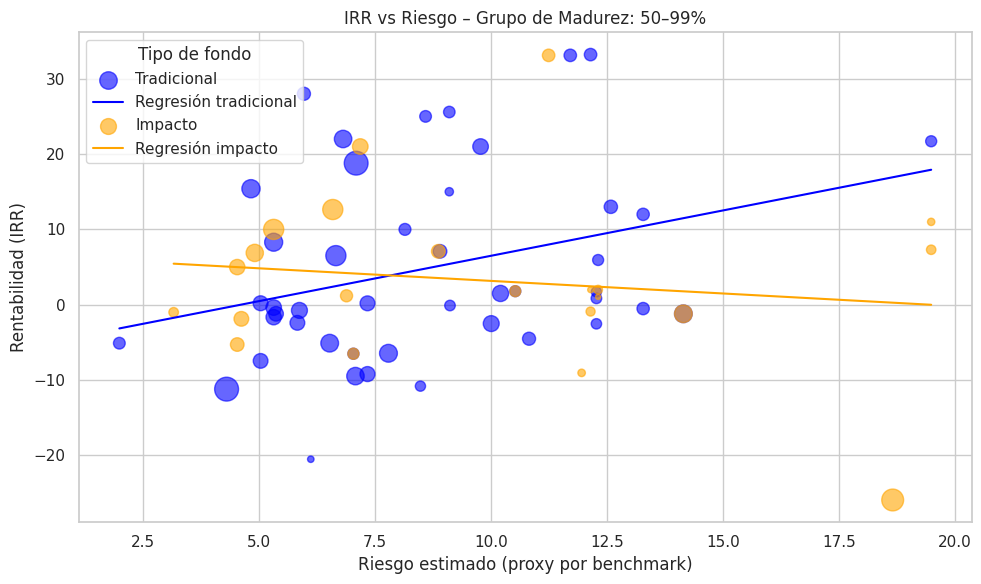


=== REGRESIÓN PARA 100–149% | TRADICIONAL ===
                            OLS Regression Results                            
Dep. Variable:                    IRR   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.133
Date:                Wed, 02 Jul 2025   Prob (F-statistic):             0.0801
Time:                        14:47:22   Log-Likelihood:                -318.11
No. Observations:                  92   AIC:                             640.2
Df Residuals:                      90   BIC:                             645.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


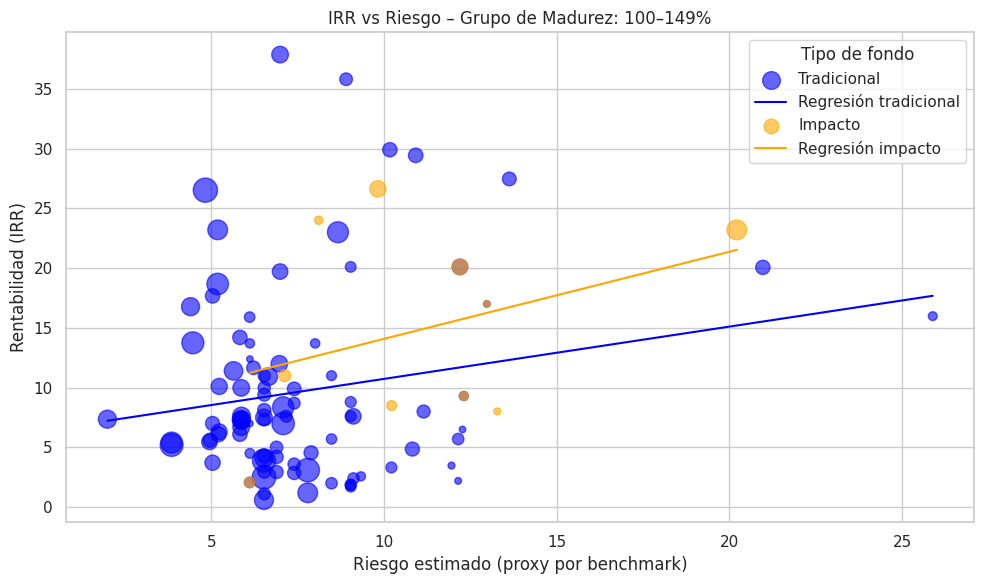


=== REGRESIÓN PARA 150%+ | TRADICIONAL ===
                            OLS Regression Results                            
Dep. Variable:                    IRR   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     7.369
Date:                Wed, 02 Jul 2025   Prob (F-statistic):            0.00724
Time:                        14:47:23   Log-Likelihood:                -753.92
No. Observations:                 194   AIC:                             1512.
Df Residuals:                     192   BIC:                             1518.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

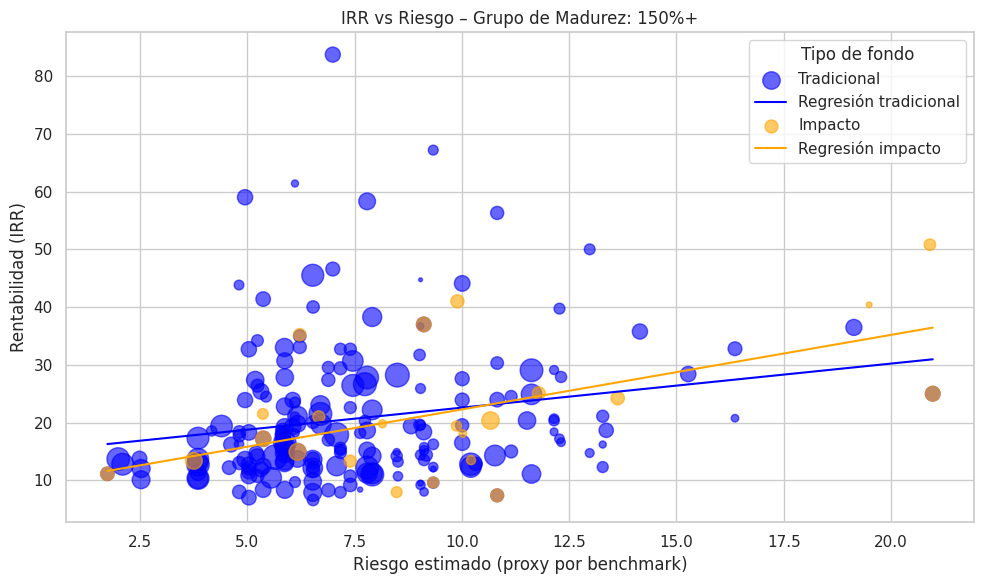

In [17]:
# Análisis por Grupos de Madurez

# Crear grupos de madurez por DPI
def clasificar_dpi(dpi):
    if pd.isna(dpi):
        return None
    elif dpi < 0.5:
        return "<50% devuelto"
    elif dpi < 1:
        return "50–99%"
    elif dpi < 1.5:
        return "100–149%"
    else:
        return "150%+"

df['grupo_distribuido'] = df['DPI'].apply(clasificar_dpi)

# Preparar datos para análisis
df_plot = df[['tipo', 'IRR', 'riesgo', 'grupo_distribuido', 'Fund Size']].dropna().copy()
df_plot['size'] = np.sqrt(df_plot['Fund Size']) * 5  # escala del tamaño del punto

# Definir grupos y colores
grupos = ['<50% devuelto', '50–99%', '100–149%', '150%+']
colores = {'tradicional': 'blue', 'impacto': 'orange'}

# Loop por grupo de madurez
for grupo in grupos:
    subset = df_plot[df_plot['grupo_distribuido'] == grupo]
    if subset.empty:
        continue

    plt.figure(figsize=(10, 6))
    plt.title(f"IRR vs Riesgo – Grupo de Madurez: {grupo}")

    for tipo in ['tradicional', 'impacto']:
        tipo_df = subset[subset['tipo'] == tipo]
        if tipo_df.empty:
            continue

        # Dispersión
        plt.scatter(tipo_df['riesgo'], tipo_df['IRR'],
                    s=tipo_df['size'],
                    color=colores[tipo],
                    alpha=0.6,
                    label=tipo.capitalize())

        # Regresión si hay suficientes datos
        if len(tipo_df) >= 5:
            X = sm.add_constant(tipo_df['riesgo'])
            y = tipo_df['IRR']
            modelo = sm.OLS(y, X).fit()

            x_vals = np.linspace(tipo_df['riesgo'].min(), tipo_df['riesgo'].max(), 100)
            X_vals = sm.add_constant(x_vals)
            y_vals = modelo.predict(X_vals)
            plt.plot(x_vals, y_vals, color=colores[tipo], label=f"Regresión {tipo}")

            print(f"\n=== REGRESIÓN PARA {grupo} | {tipo.upper()} ===")
            print(modelo.summary())
        else:
            print(f"\n[!] Grupo {grupo} | {tipo.upper()} no tiene suficientes datos ({len(tipo_df)}) para regresión.")

    plt.xlabel("Riesgo estimado (proxy por benchmark)")
    plt.ylabel("Rentabilidad (IRR)")
    plt.legend(title="Tipo de fondo")
    plt.tight_layout()
    plt.show()


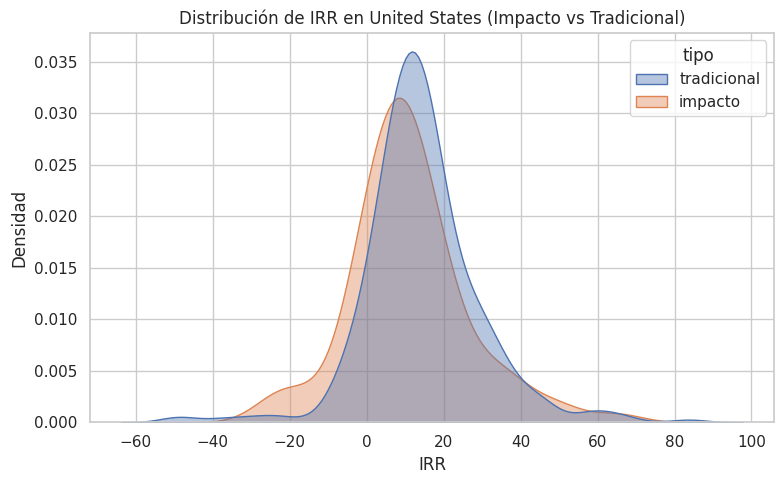

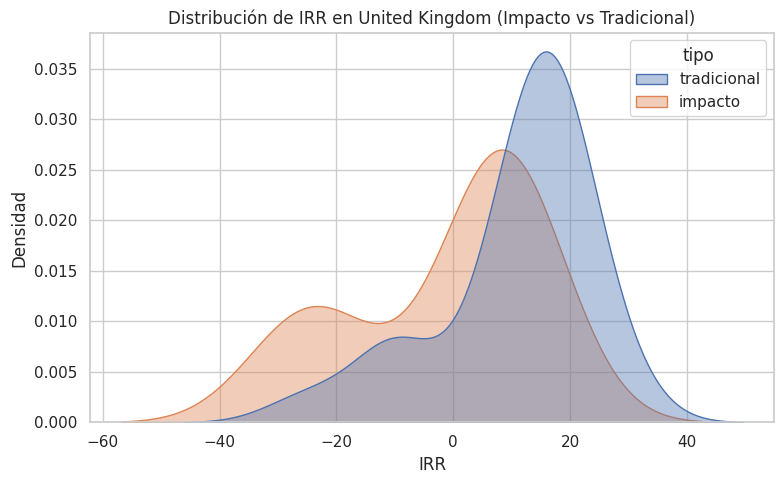

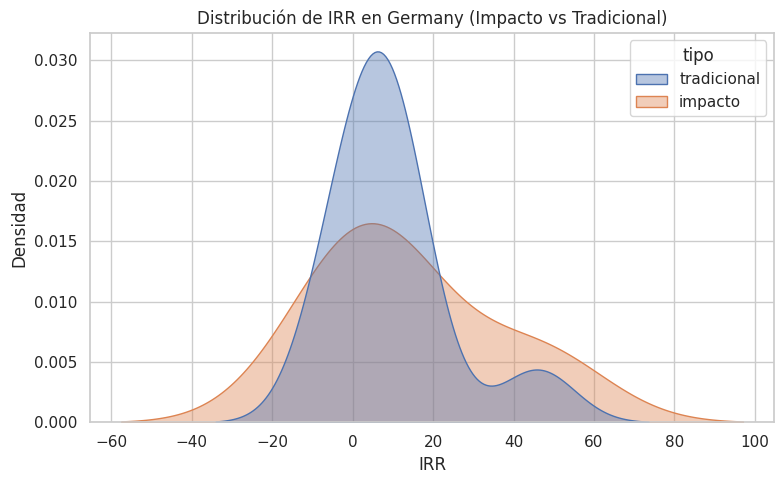

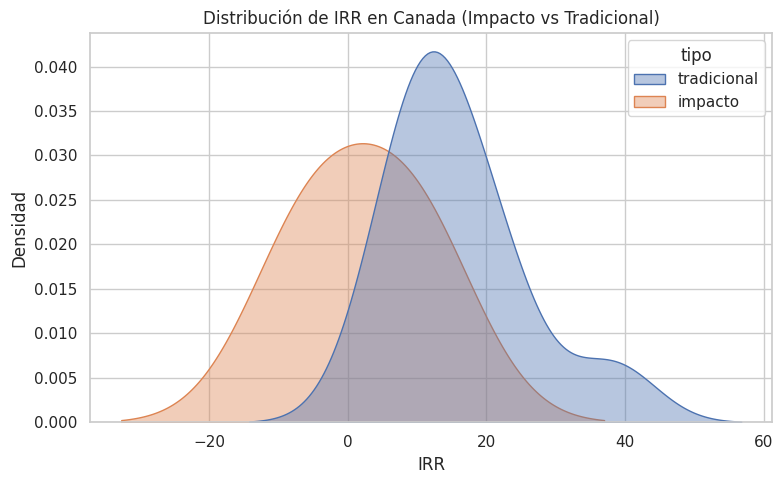

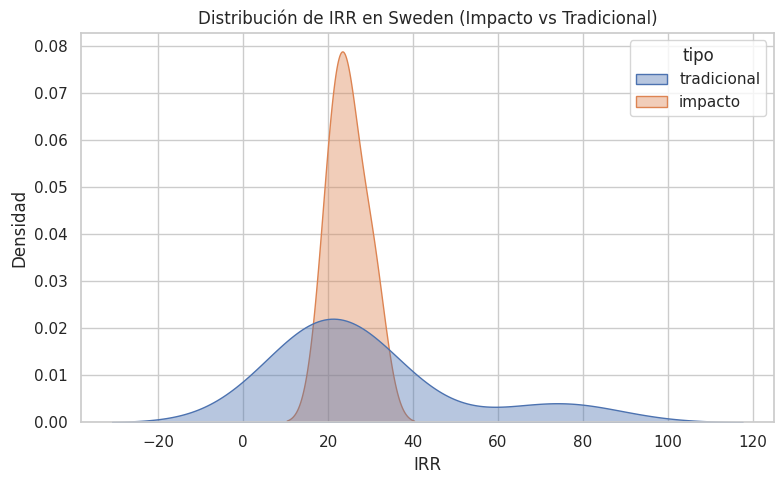

In [18]:
# Análisis por país

df['Pais'] = df['Fund Country/Territory/Region'].fillna('Desconocido')
df['Sector'] = df.get('Impact Category Preferences', df.get('Fund Type', 'Desconocido')).fillna('Desconocido')
df['Año'] = pd.to_numeric(df['Vintage'], errors='coerce')

# Limpiar y seleccionar columnas clave
df_explore = df[['IRR', 'tipo', 'Año', 'Pais', 'Sector']].dropna()

# 1. KDE por país (top 5 países más frecuentes)
# Filtrar países con representación en ambos tipos de fondo
valid_countries = df_explore.groupby(['Pais', 'tipo']).size().unstack().dropna().index

# Filtrar el dataset a esos países
df_explore = df_explore[df_explore['Pais'].isin(valid_countries)]

# Seleccionar los top 5 países más representados entre los válidos
top_countries = df_explore['Pais'].value_counts().nlargest(5).index

for pais in top_countries:
    plt.figure(figsize=(8, 5))
    subset = df_explore[df_explore['Pais'] == pais]
    sns.kdeplot(data=subset, x='IRR', hue='tipo', fill=True, common_norm=False, alpha=0.4)
    plt.title(f"Distribución de IRR en {pais} (Impacto vs Tradicional)")
    plt.xlabel("IRR")
    plt.ylabel("Densidad")
    plt.tight_layout()
    plt.show()



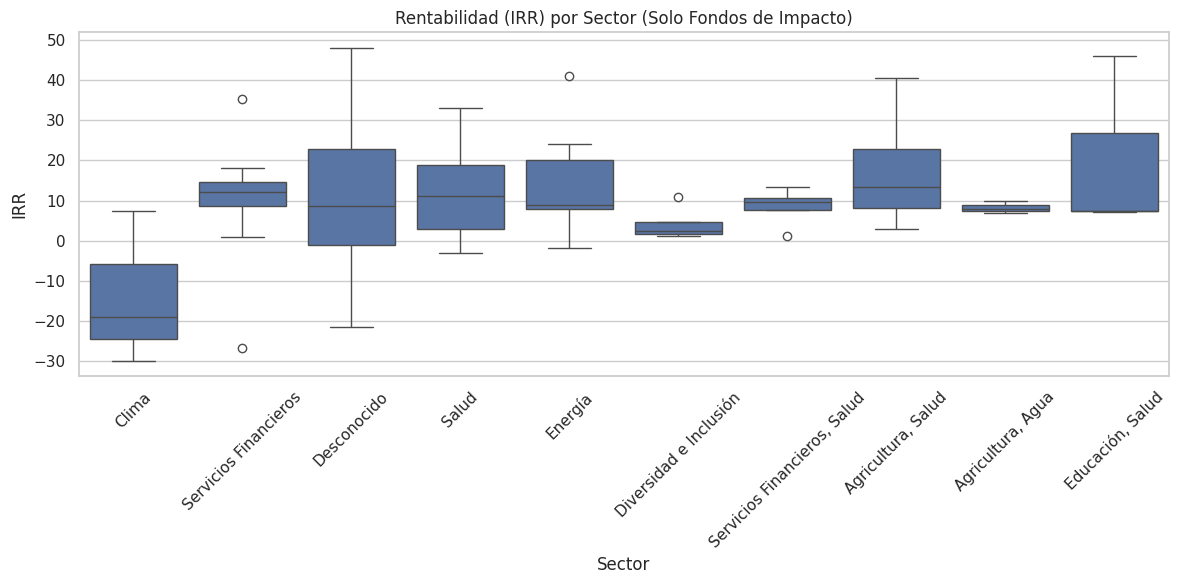

In [19]:
# Boxplot por sector (solo fondos de impacto, top 10 sectores)

top_sectors = df_explore[df_explore['tipo'] == 'impacto']['Sector'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_explore[(df_explore['tipo'] == 'impacto') & (df_explore['Sector'].isin(top_sectors))],
    x='Sector',
    y='IRR'
)
plt.title("Rentabilidad (IRR) por Sector (Solo Fondos de Impacto)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



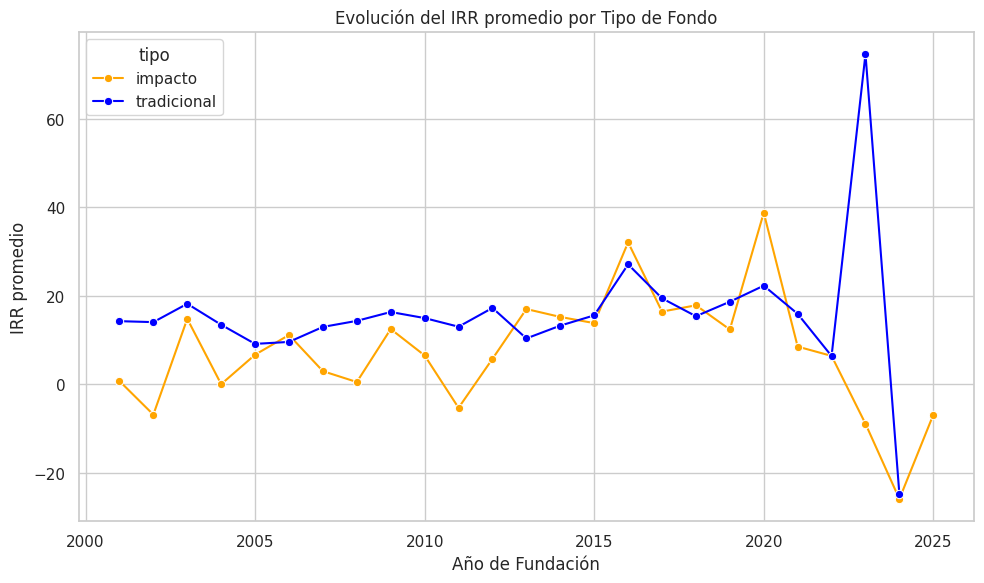

In [20]:
# Línea de evolución del IRR promedio por tipo y año

df_yearly = df_explore.groupby(['Año', 'tipo'])['IRR'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_yearly, x='Año', y='IRR', hue='tipo', marker='o', palette=colores)

plt.title("Evolución del IRR promedio por Tipo de Fondo")
plt.xlabel("Año de Fundación")
plt.ylabel("IRR promedio")
plt.tight_layout()
plt.show()


